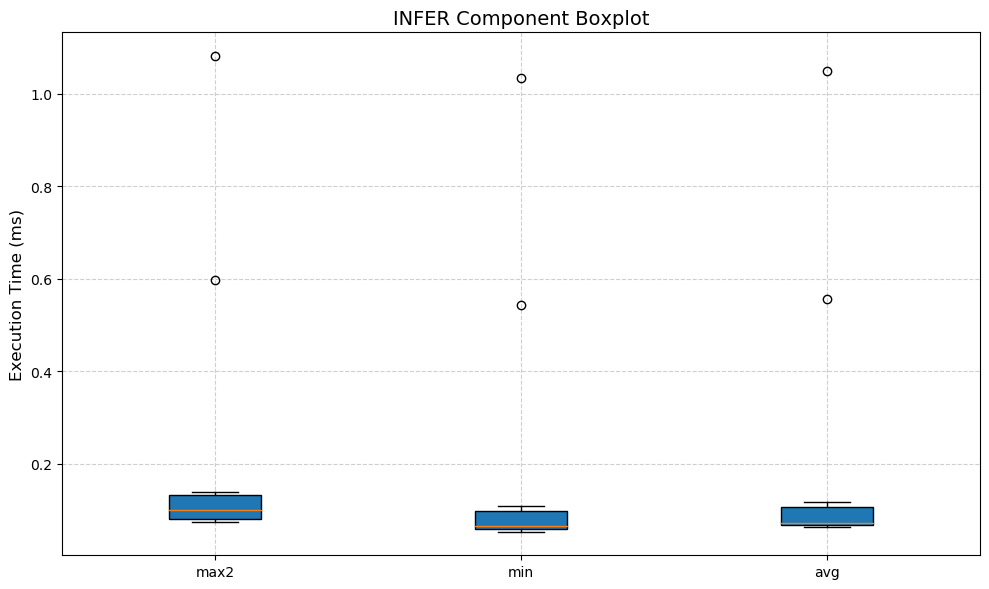

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_path = "/home/avees/tee/graph/component/src/INFER.csv"

# CSV 파일 읽기
df = pd.read_csv(csv_path, index_col=0)

# 사용할 행만 선택
selected_rows = ['max2', 'min', 'avg']
df_selected = df.loc[selected_rows]

# 데이터 전치 (열 -> 샘플, 행 -> 값 종류)
df_transposed = df_selected.transpose()

# 박스플롯 그리기
plt.figure(figsize=(10, 6))
plt.boxplot([df_transposed['max2'], df_transposed['min'], df_transposed['avg']],
            labels=['max2', 'min', 'avg'],
            patch_artist=True)

plt.title("INFER Component Boxplot", fontsize=14)
plt.ylabel("Execution Time (ms)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# 그래프 표시
plt.show()


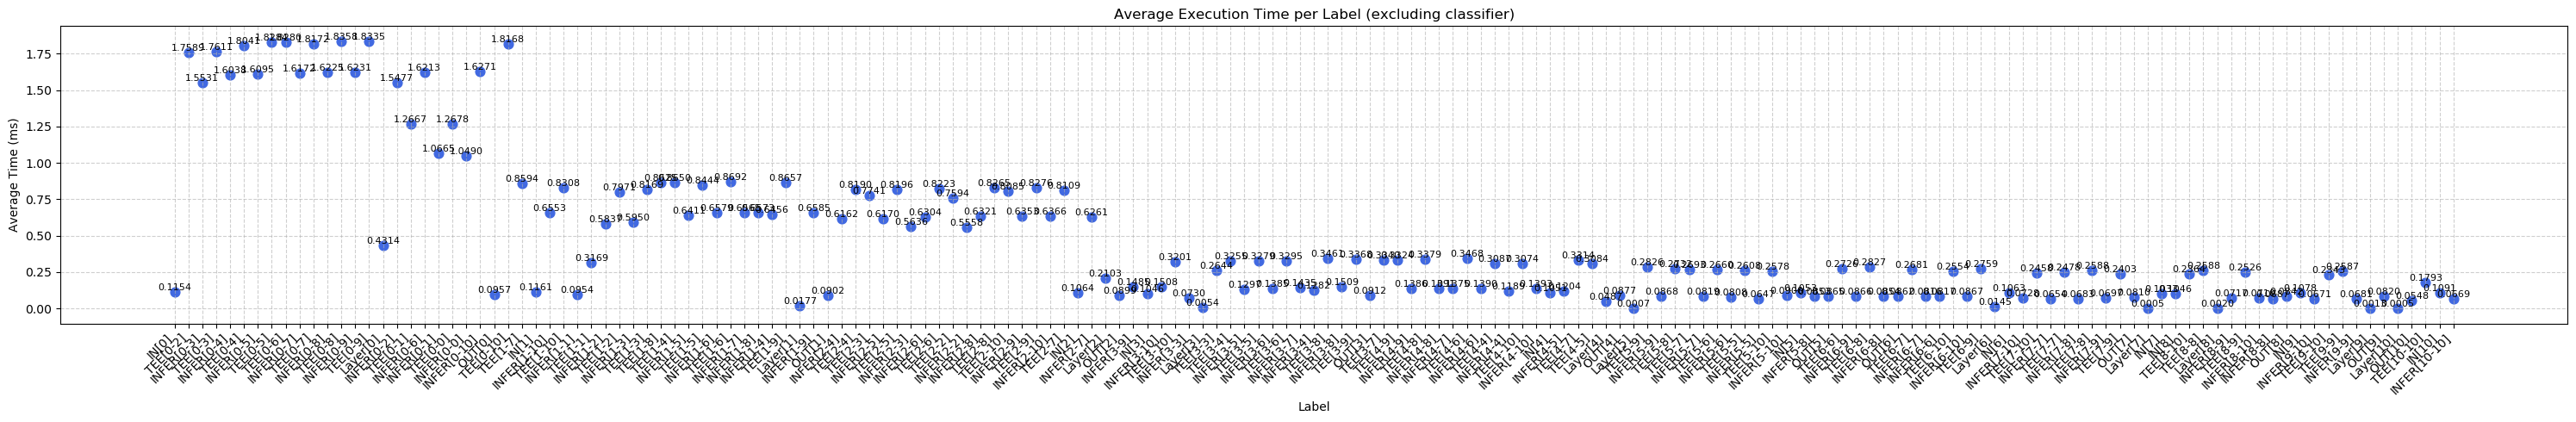

In [ ]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# CSV 폴더 경로
csv_dir = "/home/avees/tee/output/tee_time"

# 라벨별 합계, 개수 누적용 딕셔너리
sum_dict = {}
count_dict = {}

# 디렉토리 내 모든 CSV 파일 순회
for filename in sorted(os.listdir(csv_dir)):
    if filename.endswith(".csv"):
        csv_path = os.path.join(csv_dir, filename)
        df = pd.read_csv(csv_path)

        # 숫자형 컬럼만 선택
        numeric_df = df.select_dtypes(include=['number'])

        # classifier 컬럼 제외
        if "classifier" in numeric_df.columns:
            numeric_df = numeric_df.drop(columns=["classifier"])

        # 앞 5행 제외 후 평균 계산
        numeric_df = numeric_df[5:]
        col_means = numeric_df.mean()

        # 각 라벨별 합계 및 개수 누적
        for col, val in col_means.items():`
            if pd.isna(val):`
                continue
            sum_dict[col] = sum_dict.get(col, 0) + val
            count_dict[col] = count_dict.get(col, 0) + 1

# 최종 평균 계산
final_means = {col: sum_dict[col] / count_dict[col] for col in sum_dict}

# DataFrame으로 변환
result_df = pd.DataFrame(list(final_means.items()), columns=["Label", "Mean"])

# 숫자 정렬 (레이어 이름에 숫자 포함 시)
def extract_num(label):
    match = re.search(r'\d+', label)
    return int(match.group()) if match else 0

result_df["num"] = result_df["Label"].apply(extract_num)
result_df = result_df.sort_values(by="num").drop(columns=["num"])

# 점 그래프 (scatter) 그리기
plt.figure(figsize=(30, 5))
plt.scatter(result_df["Label"], result_df["Mean"], color="royalblue", s=60)

# 각 점에 평균값 표시
for x, y in zip(result_df["Label"], result_df["Mean"]):
    plt.text(x, y, f"{y:.4f}", fontsize=8, ha='center', va='bottom')

plt.title("Average Execution Time per Label (excluding classifier)")
plt.xlabel("Label")
plt.ylabel("Average Time (ms)")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [3]:
import os
import pandas as pd

# CSV 폴더 경로
csv_dir = "/home/avees/tee/output/tee_time"
output_path = os.path.join(csv_dir, "merged.csv")

# 모든 CSV를 담을 리스트
all_dfs = []

# 디렉토리 내 모든 CSV 파일 순회
for filename in sorted(os.listdir(csv_dir)):
    if filename.endswith(".csv"):
        csv_path = os.path.join(csv_dir, filename)
        df = pd.read_csv(csv_path)

        # 파일명(확장자 제외) 저장용 열 추가
        df.insert(0, "source", os.path.splitext(filename)[0])

        # DataFrame 리스트에 추가
        all_dfs.append(df)

# 모든 CSV 병합 (아래로 concat)
merged_df = pd.concat(all_dfs, ignore_index=True)

# 병합된 CSV 저장
merged_df.to_csv(output_path, index=False)

print(f"✅ 모든 CSV 파일을 병합하여 저장했습니다: {output_path}")
print(f"총 행 개수: {len(merged_df)}")


/tmp/ipykernel_9004/494692898.py:24: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  merged_df = pd.concat(all_dfs, ignore_index=True)


✅ 모든 CSV 파일을 병합하여 저장했습니다: /home/avees/tee/output/tee_time/merged.csv
총 행 개수: 6700


In [7]:
import os
import pandas as pd

# CSV 폴더 경로
csv_dir = "/home/avees/tee/output/tee_time"
output_path = os.path.join(csv_dir, "merged.csv")

all_dfs = []

# 모든 CSV 파일 읽기
for filename in sorted(os.listdir(csv_dir)):
    if filename.endswith(".csv"):
        csv_path = os.path.join(csv_dir, filename)
        df = pd.read_csv(csv_path)

        # 파일명(확장자 제외) 추가
        df.insert(0, "source", os.path.splitext(filename)[0])

        # 각 열별로 NaN이나 빈칸을 위로 올리기
        df = df.apply(lambda col: col.dropna().reset_index(drop=True))

        # 최대 길이에 맞게 다시 정렬 (짧은 열은 자동 NaN 채워짐)
        max_len = df.apply(len).max()
        df = df.reindex(range(max_len))

        all_dfs.append(df)

# 전체 파일 병합
merged_df = pd.concat(all_dfs, ignore_index=True)

# 결과 저장
merged_df.to_csv(output_path, index=False, line_terminator='\n')

print(f"✅ 각 열의 공백을 위로 올려 병합 완료: {output_path}")
print(f"총 행 개수: {len(merged_df)}")


/tmp/ipykernel_9004/2541611031.py:29: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  merged_df = pd.concat(all_dfs, ignore_index=True)


✅ 각 열의 공백을 위로 올려 병합 완료: /home/avees/tee/output/tee_time/merged.csv
총 행 개수: 6700
